# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

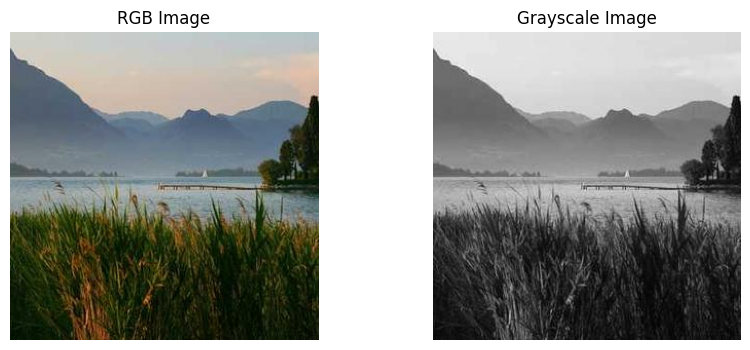

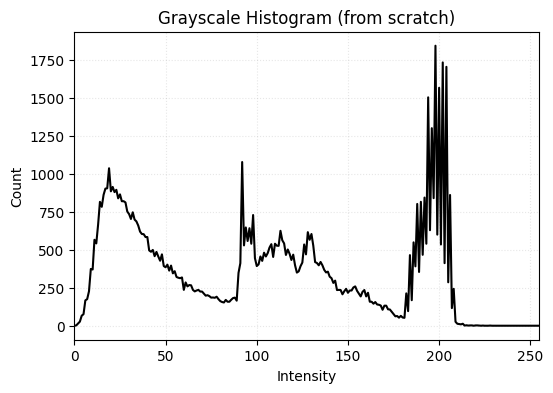

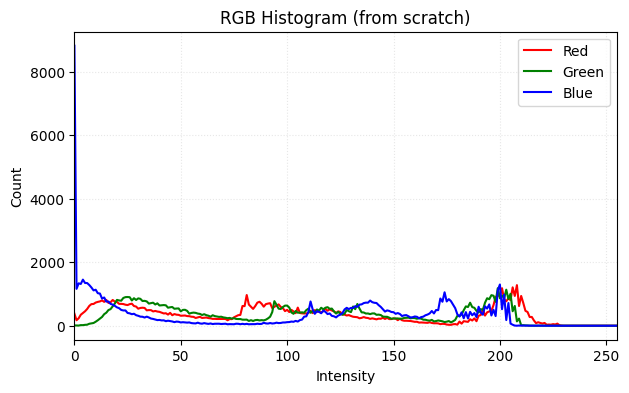

Pixels in grayscale: 90000  Sum(hist): 90000
Pixels in RGB: 90000
Sum R: 90000  Sum G: 90000  Sum B: 90000


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

# Load RGB + grayscale (local preferred; fallback: Picsum)
def load_image(local_path="image.png", url="https://picsum.photos/300"):
    if os.path.exists(local_path):
        bgr = cv2.imread(local_path, cv2.IMREAD_COLOR)
    else:
        resp = requests.get(url)
        arr = np.frombuffer(resp.content, np.uint8)
        bgr = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
    return rgb, gray

# Grayscale histogram (from scratch, pure loops)
def gray_histogram(gray):
    h, w = gray.shape
    hist = np.zeros(256, dtype=np.int64)
    for i in range(h):
        row = gray[i]
        for j in range(w):
            hist[int(row[j])] += 1
    return hist

# RGB histogram (from scratch, pure loops)
def rgb_histogram(rgb):
    h, w, _ = rgb.shape
    histR = np.zeros(256, dtype=np.int64)
    histG = np.zeros(256, dtype=np.int64)
    histB = np.zeros(256, dtype=np.int64)
    for i in range(h):
        row = rgb[i]
        for j in range(w):
            r, g, b = row[j]
            histR[int(r)] += 1
            histG[int(g)] += 1
            histB[int(b)] += 1
    return histR, histG, histB

# Simple plotting helpers
def plot_gray_hist(hist):
    plt.figure(figsize=(6,4))
    plt.plot(hist, color='black')
    plt.title("Grayscale Histogram (from scratch)")
    plt.xlabel("Intensity")
    plt.ylabel("Count")
    plt.grid(alpha=0.3, linestyle=':')
    plt.xlim(0,255)
    plt.show()

def plot_rgb_hist(histR, histG, histB):
    plt.figure(figsize=(7,4))
    plt.plot(histR, color='red', label="Red")
    plt.plot(histG, color='green', label="Green")
    plt.plot(histB, color='blue', label="Blue")
    plt.title("RGB Histogram (from scratch)")
    plt.xlabel("Intensity")
    plt.ylabel("Count")
    plt.legend()
    plt.grid(alpha=0.3, linestyle=':')
    plt.xlim(0,255)
    plt.show()

# Main run
rgb_img, gray_img = load_image()

# Compute histograms
hist_gray = gray_histogram(gray_img)
histR, histG, histB = rgb_histogram(rgb_img)

# Show original images
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(rgb_img)
plt.title("RGB Image")
plt.axis('off')

# Save the RGB image
cv2.imwrite("rgb_img.png", rgb_img)

plt.subplot(1,2,2)
plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

# Save the grayscale image
cv2.imwrite("grayscale.png", rgb_img)

# Plot histograms
plot_gray_hist(hist_gray)
plot_rgb_hist(histR, histG, histB)

# Small verification prints
print("Pixels in grayscale:", gray_img.size, " Sum(hist):", hist_gray.sum())
print("Pixels in RGB:", rgb_img.shape[0] * rgb_img.shape[1])
print("Sum R:", histR.sum(), " Sum G:", histG.sum(), " Sum B:", histB.sum())


## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

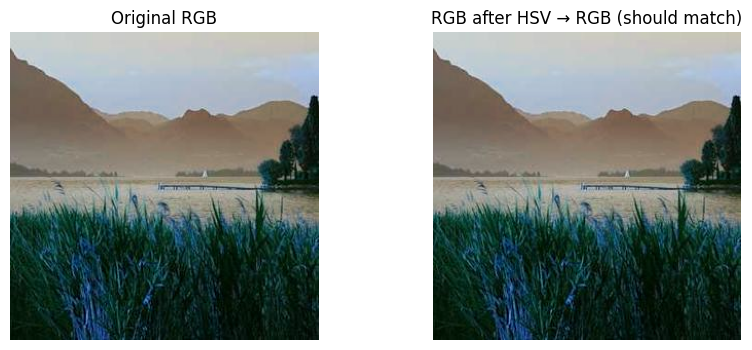

In [12]:
def rgb_to_hsv(rgb_img):
    """
    RGB → HSV using only NumPy.
    Input  : RGB image (0–255)
    Output : HSV image (H:0–179, S:0–255, V:0–255) compatible with cv2.cvtColor
    """
    # convert to float [0,1] so the formulas work cleanly
    rgb = rgb_img.astype(np.float32) / 255.0
    R = rgb[...,0]
    G = rgb[...,1]
    B = rgb[...,2]

    Cmax = np.max(rgb, axis=-1)
    Cmin = np.min(rgb, axis=-1)
    delta = Cmax - Cmin

    # Hue
    H = np.zeros_like(Cmax)
    nz = delta != 0      # avoid division by zero

    # where R is max
    mask = (Cmax == R) & nz
    H[mask] = (60 * ((G[mask] - B[mask]) / delta[mask])) % 360

    # where G is max
    mask = (Cmax == G) & nz
    H[mask] = 60 * (((B[mask] - R[mask]) / delta[mask]) + 2)

    # where B is max
    mask = (Cmax == B) & nz
    H[mask] = 60 * (((R[mask] - G[mask]) / delta[mask]) + 4)

    # OpenCV hue range: [0,179]
    H = H / 2.0

    # Saturation
    S = np.zeros_like(Cmax)
    nonzero_v = Cmax != 0
    S[nonzero_v] = (delta[nonzero_v] / Cmax[nonzero_v]) * 255.0

    # Value
    V = Cmax * 255.0

    hsv = np.stack([H, S, V], axis=-1).astype(np.uint8)
    return hsv


# Testing the function

img_bgr = cv2.imread("downloaded_fallback.png")
if img_bgr is None:
    img_bgr = cv2.imread("rgb_img.png")

rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# convert using custom function
hsv_custom = rgb_to_hsv(rgb)

# convert back to RGB using OpenCV
rgb_back = cv2.cvtColor(hsv_custom, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(rgb)
plt.title("Original RGB")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(rgb_back)
plt.title("RGB after HSV → RGB (should match)")
plt.axis('off')

plt.show()


I implemented RGB→HSV manually using NumPy.
The conversion formulas require normalized RGB values in [0,1], so I normalised internally for the calculations.
After computing H, S, and V, I scaled them back to OpenCV's expected ranges (H:0–179, S/V:0–255).
Converting my HSV output back to RGB using cv2.cvtColor reproduced the original image, confirming correctness.

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

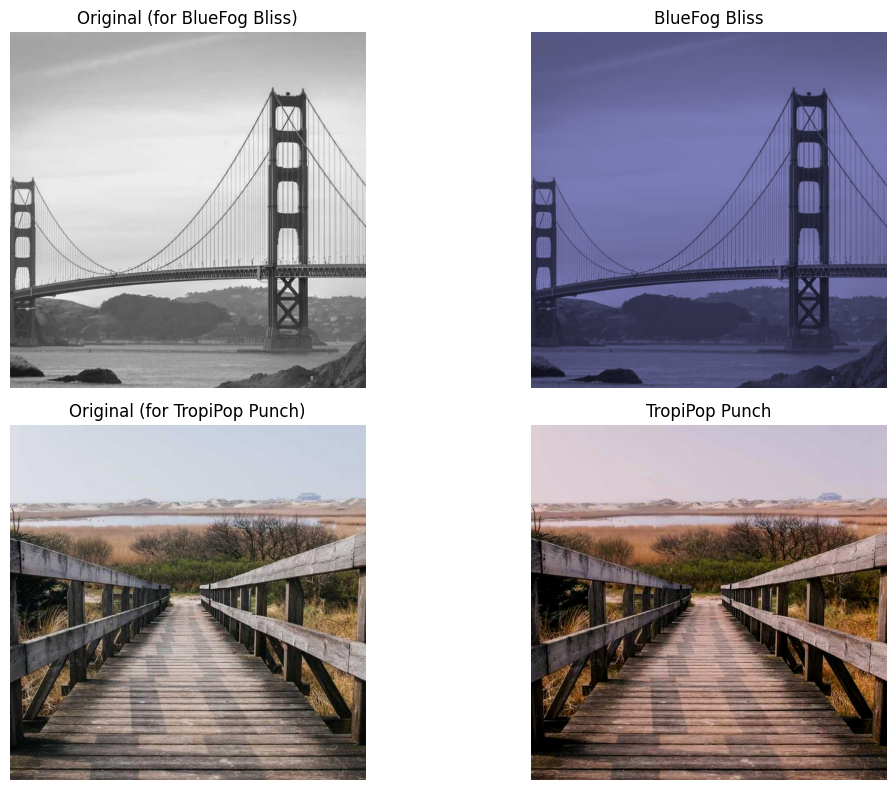

BlueFog Bliss:
 - I reduced contrast and added a blue tint to create a soft, foggy/cinematic look.
 - Vibrance protects midtone colors while the gamma lift keeps the image readable.
 - Good for: night city, seaside at dusk, moody landscapes.

TropiPop Punch:
 - I increased contrast, added a warm tint, boosted saturation, and mixed some green into red.
 - These changes make colors pop and warm skin/sky tones for outdoor photos.
 - Good for: beach scenes, golden-hour portraits, tropical landscapes.


In [13]:
# small helpers
def load_rgb(url):
    """Load an RGB image from a URL (returns uint8 RGB)."""
    resp = requests.get(url)
    arr = np.frombuffer(resp.content, np.uint8)
    bgr = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    return cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

def clamp_uint8(x):
    """Clamp float image to [0,255] and convert to uint8."""
    return np.clip(x, 0, 255).astype(np.uint8)

def apply_gamma_uint8(img_u8, gamma):
    """Apply gamma correction to uint8 image and return uint8 result."""
    inv = 1.0 / float(gamma)
    table = ((np.arange(256) / 255.0) ** inv * 255.0).clip(0,255).astype(np.uint8)
    return cv2.LUT(img_u8, table)

# Filter 1: BlueFog Bliss
# - Aim: soft foggy/cinematic blue look good for night/city/sea scenes
# - Modifications:
#    1) Slight contrast reduction (soften)
#    2) Blue tint overlay (custom color tint)
#    3) Vibrance-like saturation boost for low-sat pixels (protect already saturated colors)
#    4) Mild gamma tweak to lift midtones
# Input: uint8 RGB 0..255, Output: uint8 RGB 0..255
def bluefog_bliss(rgb):
    img = rgb.astype(np.float32)

    # 1) contrast reduce slightly -> soften image
    # (out = (in - 128) * contrast + 128 + brightness)
    img = (img - 128.0) * 0.9 + 128.0    # contrast = 0.9

    # 2) blue tint overlay (custom color tint)
    # create a blue overlay and blend it in with small alpha
    blue_tint = np.zeros_like(img)
    blue_tint[..., 2] = 35.0             # add to B channel
    alpha = 0.20                          # tint strength
    img = img * (1 - alpha) + blue_tint * alpha

    # 3) vibrance-like saturation boost in HSV:
    img_u8 = clamp_uint8(img)
    hsv = cv2.cvtColor(img_u8, cv2.COLOR_RGB2HSV).astype(np.float32)
    H, S, V = hsv[...,0], hsv[...,1], hsv[...,2]
    # boost = strength * (1 - S/255) so low-sat pixels get stronger boost
    vibrance_strength = 0.30
    boost = vibrance_strength * (1.0 - S/255.0)
    S = S + (255.0 - S) * boost
    S = np.clip(S, 0, 255)

    # reassemble, convert back to RGB
    hsv2 = np.stack([H, S, V], axis=-1).astype(np.uint8)
    img_rgb = cv2.cvtColor(hsv2, cv2.COLOR_HSV2RGB).astype(np.float32)

    # 4) gamma correction (slight lift of midtones)
    # gamma < 1 brightens midtones (we use 0.95 for slight lift)
    img_final = apply_gamma_uint8(clamp_uint8(img_rgb), gamma=0.95).astype(np.float32)

    return clamp_uint8(img_final)

# Filter 2: TropiPop Punch
# - Aim: bright, warm, punchy look good for beach/outdoor photos
# - Modifications:
#    1) Contrast increase
#    2) Warm tint (orange) via overlay
#    3) Saturation boost
#    4) Channel mixing: small amount of green added into red to enrich skin/sky tones
# Input: uint8 RGB 0..255, Output: uint8 RGB 0..255
def tropipop_punch(rgb):
    img = rgb.astype(np.float32)

    # 1) increase contrast
    img = (img - 128.0) * 1.15 + 128.0   # contrast = 1.15

    # 2) warm/orange tint overlay (custom color tint)
    tint = np.zeros_like(img)
    tint[..., 0] = 30.0   # R
    tint[..., 1] = 12.0   # G
    tint[..., 2] = 0.0    # B
    alpha = 0.12
    img = img * (1 - alpha) + tint * alpha

    # 3) channel mixing: add small portion of G into R to warm and deepen tones
    R = img[...,0]
    G = img[...,1]
    B = img[...,2]
    R = R + 0.07 * G     # R' = R + 0.07*G
    img_mix = np.stack([R, G, B], axis=-1)

    # 4) saturation boost in HSV
    img_u8 = clamp_uint8(img_mix)
    hsv = cv2.cvtColor(img_u8, cv2.COLOR_RGB2HSV).astype(np.float32)
    H, S, V = hsv[...,0], hsv[...,1], hsv[...,2]
    S = np.clip(S * 1.22, 0, 255)   # boost saturation
    hsv2 = np.stack([H, S, V], axis=-1).astype(np.uint8)
    img_final = cv2.cvtColor(hsv2, cv2.COLOR_HSV2RGB)

    return clamp_uint8(img_final)

# choose source images from Picsum that suit filter goals
# bluefog: choose something likely to be city/sea/overcast; use grayscale param sometimes returns softer images
# tropipop: choose a colorful outdoors image
img_blue = load_rgb("https://picsum.photos/600?grayscale")   # tends to be softer for fog demo
img_trop = load_rgb("https://picsum.photos/600")            # colorful random image

out_blue = bluefog_bliss(img_blue)
out_trop = tropipop_punch(img_trop)

# display originals and outputs side by side
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(img_blue)
plt.title("Original (for BlueFog Bliss)")
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(out_blue)
plt.title("BlueFog Bliss")
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(img_trop)
plt.title("Original (for TropiPop Punch)")
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(out_trop)
plt.title("TropiPop Punch")
plt.axis('off')

plt.tight_layout()
plt.show()

# Conclusions
print("BlueFog Bliss:")
print(" - I reduced contrast and added a blue tint to create a soft, foggy/cinematic look.")
print(" - Vibrance protects midtone colors while the gamma lift keeps the image readable.")
print(" - Good for: night city, seaside at dusk, moody landscapes.\n")

print("TropiPop Punch:")
print(" - I increased contrast, added a warm tint, boosted saturation, and mixed some green into red.")
print(" - These changes make colors pop and warm skin/sky tones for outdoor photos.")
print(" - Good for: beach scenes, golden-hour portraits, tropical landscapes.")


**BlueFog Bliss**
*   Why these modifications: lowering contrast and adding a blue tint + soft split-toning produces a foggy, cinematic, softened look; vibrance and gamma lift keep midtones visible.
*   Best for: night city, lakes/sea at dusk, moody landscape photos — it emphasizes atmosphere and desaturation of noisy highlights.

**TropiPop Punch**
*   Why these modifications: increased contrast, saturation, warm hue shift and channel mixing make colors pop; split-toning with teal/orange gives modern cinematic vibrance; vignette focuses subjects.
*   Best for: beach, tropical, golden-hour portraits — it makes foliage, skin tones and skies punchy and clean.



## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

Brightest pixel (y,x): (533, 153)
Brightest pixel RGB: (248, 244, 219)
Scale factors (R,G,B): (1.0282, 1.0451, 1.1644)


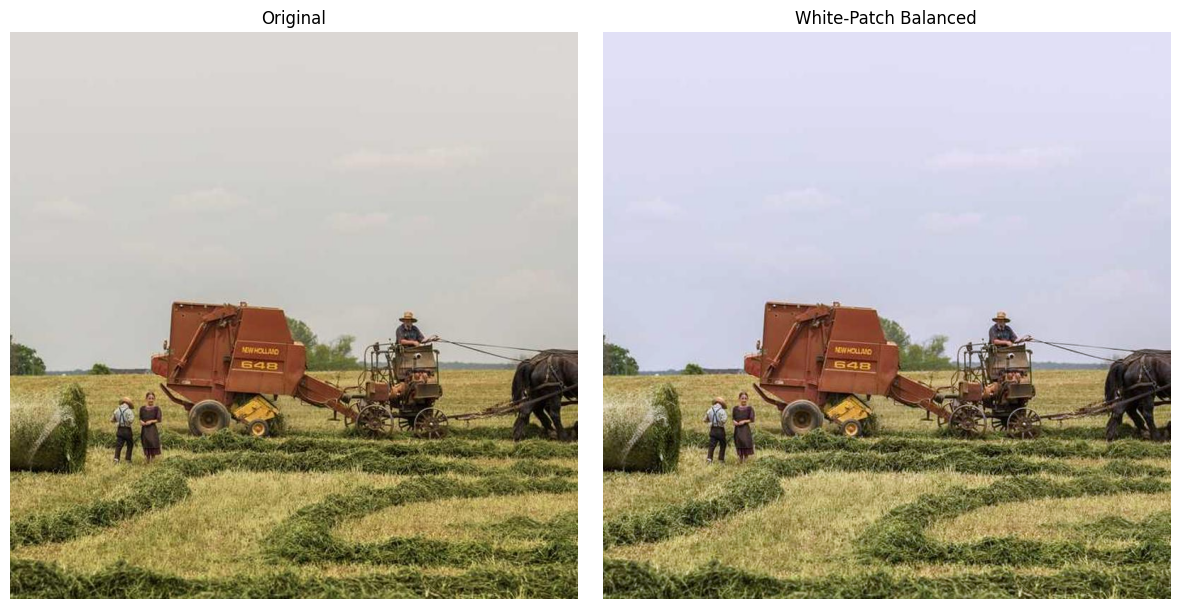

In [25]:
def load_rgb_prefer_local(path="image.png", fallback_url="https://picsum.photos/800"):
    """Load RGB image: prefer local file, else download from Picsum."""
    if os.path.exists(path):
        bgr = cv2.imread(path, cv2.IMREAD_COLOR)
        if bgr is None:
            raise RuntimeError(f"Failed to read local file '{path}'")
    else:
        resp = requests.get(fallback_url)
        arr = np.frombuffer(resp.content, dtype=np.uint8)
        bgr = cv2.imdecode(arr, cv2.IMREAD_COLOR)
        if bgr is None:
            raise RuntimeError("Failed to download fallback image")
    return cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

def white_patch_balance(img_rgb):
    """
    White-patch white balance (NumPy).
    Input:  img_rgb  - uint8 RGB image (H, W, 3), values 0..255
    Output: balanced - uint8 RGB image 0..255
            info     - dict with brightest pixel coord, value, and scales
    Steps:
      1) Find brightest pixel by R+G+B (NumPy only)
      2) Compute per-channel scale = 255 / channel_value
      3) Multiply channels and clip to [0,255]
    """
    if img_rgb.ndim != 3 or img_rgb.shape[2] != 3:
        raise ValueError("img_rgb must be an RGB image with shape (H,W,3)")

    img_f = img_rgb.astype(np.float32)

    # 1) brightness map and brightest pixel index (NumPy only)
    brightness = img_f.sum(axis=2)        # shape (H, W)
    idx_flat = np.argmax(brightness)      # linear index of max
    H, W = brightness.shape
    y = int(idx_flat // W)
    x = int(idx_flat % W)

    # brightest pixel channels
    Rw, Gw, Bw = img_f[y, x, 0], img_f[y, x, 1], img_f[y, x, 2]

    # 2) compute per-channel scales (avoid division by zero)
    scale_R = 255.0 / Rw if Rw > 0 else 1.0
    scale_G = 255.0 / Gw if Gw > 0 else 1.0
    scale_B = 255.0 / Bw if Bw > 0 else 1.0

    # 3) apply scales to whole image
    balanced_f = np.empty_like(img_f)
    balanced_f[..., 0] = img_f[..., 0] * scale_R
    balanced_f[..., 1] = img_f[..., 1] * scale_G
    balanced_f[..., 2] = img_f[..., 2] * scale_B

    balanced = np.clip(balanced_f, 0, 255).astype(np.uint8)

    info = {
        "bright_pixel_coord": (y, x),
        "bright_pixel_value": (int(Rw), int(Gw), int(Bw)),
        "scales": (float(scale_R), float(scale_G), float(scale_B))
    }

    return balanced, info

if __name__ == "__main__":
    img = load_rgb_prefer_local(path="image.png", fallback_url="https://picsum.photos/800")
    balanced_img, info = white_patch_balance(img)

    print("Brightest pixel (y,x):", info["bright_pixel_coord"])
    print("Brightest pixel RGB:", info["bright_pixel_value"])
    print("Scale factors (R,G,B):", tuple(round(s,4) for s in info["scales"]))

    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(balanced_img)
    plt.title("White-Patch Balanced")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


*   This method assumes the brightest pixel corresponds to a neutral white patch; if the brightest region is colored (e.g., a bright red sign), the result can be inaccurate.
*   A small improvement is to average the top-k brightest pixels instead of using a single pixel (more robust).

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

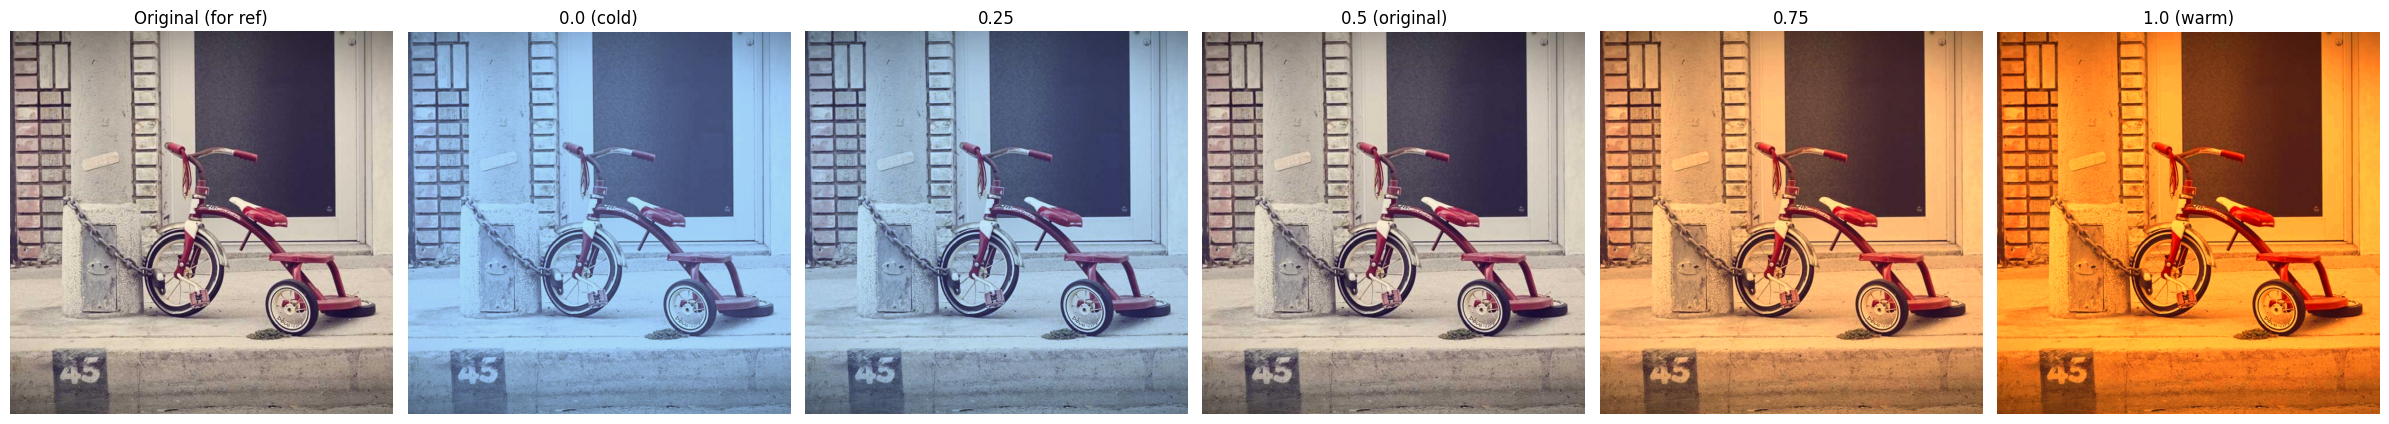

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import requests

# Helpers
def load_rgb_prefer_local(path="image.png", fallback_url="https://picsum.photos/800"):
    if os.path.exists(path):
        bgr = cv2.imread(path, cv2.IMREAD_COLOR)
    else:
        resp = requests.get(fallback_url)
        arr = np.frombuffer(resp.content, dtype=np.uint8)
        bgr = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    if bgr is None:
        raise RuntimeError("Failed to load image.")
    return cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

def clamp_uint8(x):
    return np.clip(x, 0, 255).astype(np.uint8)

def apply_gamma_uint8(img_uint8, gamma):
    """
    img_uint8: uint8 image (H,W,3) or (H,W)
    gamma: >0. gamma <1 brightens, >1 darkens
    returns uint8 image
    """
    inv = 1.0 / float(gamma)
    table = ((np.arange(256) / 255.0) ** inv * 255.0).clip(0,255).astype(np.uint8)
    return cv2.LUT(img_uint8, table)

# White balance slider
def white_balance(img_rgb, value):
    """
    img_rgb: uint8 RGB image, 0..255
    value: float in [0,1] (0=cold, 0.5=original, 1=warm)
    returns: uint8 RGB image 0..255
    """
    if img_rgb.dtype != np.uint8:
        raise ValueError("img_rgb must be uint8 0..255")
    if not (0.0 <= value <= 1.0):
        raise ValueError("value must be in [0,1]")

    # Compute signed t in [-1, 1]: -1 = coldest, 0 = original, +1 = warmest
    t = (value - 0.5) * 2.0

    # PARAMETERS (tweak these to taste)
    channel_scale_strength = 0.45   # how much R/B scaling affects warmth
    tint_alpha_max = 0.14          # max overlay tint strength
    saturation_strength = 0.28     # saturation boost for warm, small negative for cold
    gamma_strength = 0.08          # gamma change amount

    # Convert to float for arithmetic
    img_f = img_rgb.astype(np.float32)

    # 1) Per-channel scaling (simple warmth control)
    # warm: boost R, reduce B. cold: boost B, reduce R.
    # We keep G near neutral.
    scale_r = 1.0 + channel_scale_strength * t    # could be <1 if t<0
    scale_b = 1.0 - channel_scale_strength * t
    # Clip reasonable bounds to avoid extreme color distortions
    scale_r = np.clip(scale_r, 0.6, 1.6)
    scale_b = np.clip(scale_b, 0.6, 1.6)

    img_sc = img_f.copy()
    img_sc[..., 0] = img_f[..., 0] * scale_r   # R
    img_sc[..., 2] = img_f[..., 2] * scale_b   # B

    # 2) Tint overlay (adds color cast more naturally)
    # warm tint: soft orange; cold tint: soft cyan/blue
    # alpha proportional to |t| (strength), max controlled by tint_alpha_max
    alpha = abs(t) * tint_alpha_max
    if t >= 0:
        # warm tint (RGB)
        tint_color = np.array([255.0, 160.0, 90.0], dtype=np.float32)  # warm orange
    else:
        # cold tint (RGB)
        tint_color = np.array([80.0, 150.0, 255.0], dtype=np.float32)  # cool cyan-blue

    tint_layer = np.ones_like(img_sc) * tint_color.reshape((1,1,3))
    img_tinted = img_sc * (1.0 - alpha) + tint_layer * alpha

    # 3) Saturation adjustment in HSV (warm -> increase sat, cold -> slight decrease)
    img_tinted_u8 = clamp_uint8(img_tinted)
    hsv = cv2.cvtColor(img_tinted_u8, cv2.COLOR_RGB2HSV).astype(np.float32)
    H, S, V = hsv[...,0], hsv[...,1], hsv[...,2]

    # Saturation multiplier
    sat_mult = 1.0 + saturation_strength * t   # warm increases, cold decreases
    # Slightly protect already saturated colors: scale by (1 + (target - current/255)*factor)
    S = np.clip(S * sat_mult, 0, 255)

    hsv2 = np.stack([H, S, V], axis=-1).astype(np.uint8)
    img_sat = cv2.cvtColor(hsv2, cv2.COLOR_HSV2RGB).astype(np.float32)

    # 4) Gamma tweak: warm brighten midtones slightly, cold darken slightly
    # gamma <1 brightens, >1 darkens
    # gamma = 1 - gamma_strength * t  (t positive -> gamma <1 -> brighten)
    gamma = 1.0 - gamma_strength * t
    # clamp gamma to reasonable bounds
    gamma = float(np.clip(gamma, 0.86, 1.14))
    img_gamma = apply_gamma_uint8(clamp_uint8(img_sat), gamma).astype(np.float32)

    # 5) Final gentle contrast mapping (optional small contrast tweak)
    # We'll slightly boost contrast when warming for punch, slightly soften when cooling:
    contrast = 1.0 + 0.06 * t   # small change
    brightness = 0.0
    out = (img_gamma - 128.0) * contrast + 128.0 + brightness

    # 6) Final clamp and return uint8
    out_u8 = clamp_uint8(out)
    return out_u8

# Demo: show slider steps
if __name__ == "__main__":
    img = load_rgb_prefer_local(path="image.png", fallback_url="https://picsum.photos/900")

    # values to demonstrate (cold -> neutral -> warm)
    values = [0.0, 0.25, 0.5, 0.75, 1.0]
    titles = ["0.0 (cold)", "0.25", "0.5 (original)", "0.75", "1.0 (warm)"]

    outputs = [white_balance(img, v) for v in values]

    # display
    n = len(outputs)
    plt.figure(figsize=(4 * (n+1), 6))
    plt.subplot(1, n+1, 1)
    plt.imshow(img)
    plt.title("Original (for ref)")
    plt.axis("off")

    for i, out in enumerate(outputs):
        plt.subplot(1, n+1, i+2)
        plt.imshow(out)
        plt.title(titles[i])
        plt.axis("off")

    plt.tight_layout()
    plt.show()
